# Prosper Loan Data Project

## Import Functions

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import numpy as np
import pandas as pd
import seaborn as sns
import time

from scipy.stats import mode
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

20

### Make Some important Functions

In [ ]:
def Mode(x):
    return x.mode()[0]

def XY_Labels (x,y):
    X = plt.xlabel(x, fontsize = 15)
    Y = plt.ylabel(y, fontsize = 15)
    return (X,Y)

def label_encoder(b):
    le= preprocessing.LabelEncoder()
    return le.fit_transform(b)

## Data Wrangling

### Load and discover data

In [ ]:
df = pd.read_csv('prosperLoanData.csv')
df.head(7)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [ ]:
print(df.shape)

(113937, 81)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [ ]:
print(df.columns)

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### Make a new df with the important columns i will use

In [ ]:
new_df = df[['ListingNumber', 'ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
        'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation',
        'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines',
        'OpenRevolvingAccounts', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome',
        'LoanOriginalAmount', 'LoanOriginationDate']].copy()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   ListingCreationDate        113937 non-null  object 
 2   Term                       113937 non-null  int64  
 3   LoanStatus                 113937 non-null  object 
 4   BorrowerAPR                113912 non-null  float64
 5   BorrowerRate               113937 non-null  float64
 6   ProsperRating (Alpha)      84853 non-null   object 
 7   ProsperScore               84853 non-null   float64
 8   ListingCategory (numeric)  113937 non-null  int64  
 9   BorrowerState              108422 non-null  object 
 10  Occupation                 110349 non-null  object 
 11  EmploymentStatus           111682 non-null  object 
 12  IsBorrowerHomeowner        113937 non-null  bool   
 13  CreditScoreRangeLower      11

In [ ]:
new_df.head(7)

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,...,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenRevolvingAccounts,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate
0,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,NaN,NaN,0,CO,...,640.0,659.0,5.0,1,0.17,"$25,000-49,999",True,3083.333333,9425,2007-09-12 00:00:00
1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,A,7.0,2,CO,...,680.0,699.0,14.0,13,0.18,"$50,000-74,999",True,6125.000000,10000,2014-03-03 00:00:00
2,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,NaN,NaN,0,GA,...,480.0,499.0,NaN,0,0.06,Not displayed,True,2083.333333,3001,2007-01-17 00:00:00
3,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,A,9.0,16,GA,...,800.0,819.0,5.0,7,0.15,"$25,000-49,999",True,2875.000000,10000,2012-11-01 00:00:00
4,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,D,4.0,2,MN,...,680.0,699.0,19.0,6,0.26,"$100,000+",True,9583.333333,15000,2013-09-20 00:00:00
5,1074836,2013-12-14 08:26:37.093000000,60,Current,0.15425,0.1314,B,10.0,1,NM,...,740.0,759.0,21.0,13,0.36,"$100,000+",True,8333.333333,15000,2013-12-24 00:00:00
6,750899,2013-04-12 09:52:56.147000000,36,Current,0.31032,0.2712,E,2.0,1,KS,...,680.0,699.0,10.0,6,0.27,"$25,000-49,999",True,2083.333333,3000,2013-04-18 00:00:00


In [ ]:
#To Display hidden columns
New_df_hidden = df[['BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner',
                    'CreditScoreRangeLower']].copy()
New_df_hidden.head(7)

,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower
0,CO,Other,Self-employed,True,640.0
1,CO,Professional,Employed,False,680.0
2,GA,Other,Not available,False,480.0
3,GA,Skilled Labor,Employed,True,800.0
4,MN,Executive,Employed,True,680.0
5,NM,Professional,Employed,True,740.0
6,KS,Sales - Retail,Employed,False,680.0


## Clean our data and Create a new columns

In [ ]:
new_df['ListingCreationDate'] = pd.to_datetime(new_df['ListingCreationDate'])
new_df['LoanOriginationDate'] = pd.to_datetime(new_df['LoanOriginationDate'])

new_df['Date'] = new_df['ListingCreationDate'].dt.date
new_df['Year'] = new_df['ListingCreationDate'].dt.year
new_df['Month'] = new_df['ListingCreationDate'].dt.month

print(new_df['Date'].dtypes)
print(new_df['Year'].dtypes)
print(new_df['Month'].dtypes)

object
int64
int64


In [ ]:
new_df['Date'] = pd.to_datetime(new_df['Date'])
print(new_df['Date'].dtypes)
#new_df['Month'] = new_df['Date'].dt.month_name()
#print(new_df['Month'].unique())

datetime64[ns]


In [ ]:
new_df['ListingCategory (numeric)'].replace({ 0 : 'Not_Available', 1 : 'Debt_Consolidation', 2 : 'Home_Improvement',
        3 : 'Business', 4 : 'Personal_Loan', 5 : 'Student_Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat',
        10 : 'Cosmetic_Procedure', 11 : 'Engagement_Ring', 12 : 'Green_Loans', 13 : 'Household_Expenses',
        14 : 'Large_Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation',
        20 : 'Wedding_Loans' }, inplace=True)

In [ ]:
new_df.rename(columns = { 'ListingNumber' : 'ListingID',
                          'ListingCategory (numeric)' : 'ListingCategory' }, inplace = True)
new_df['ListingCategory'].value_counts()

Debt_Consolidation    58308
Not_Available         16965
Other                 10494
Home_Improvement       7433
Business               7189
Auto                   2572
Personal_Loan          2395
Household_Expenses     1996
Medical/Dental         1522
Taxes                   885
Large_Purchases         876
Wedding_Loans           771
Vacation                768
Student_Use             756
Motorcycle              304
Engagement_Ring         217
Baby&Adoption           199
Cosmetic_Procedure       91
Boat                     85
Green_Loans              59
RV                       52
Name: ListingCategory, dtype: int64

In [ ]:
new_df.isnull().sum()

ListingID                    0
ListingCreationDate          0
Term                         0
LoanStatus                   0
BorrowerAPR                 25
BorrowerRate                 0
ProsperRating (Alpha)    29084
ProsperScore             29084
ListingCategory              0
BorrowerState             5515
Occupation                3588
EmploymentStatus          2255
IsBorrowerHomeowner          0
CreditScoreRangeLower      591
CreditScoreRangeUpper      591
CurrentCreditLines        7604
OpenRevolvingAccounts        0
DebtToIncomeRatio         8554
IncomeRange                  0
IncomeVerifiable             0
StatedMonthlyIncome          0
LoanOriginalAmount           0
LoanOriginationDate          0
Date                         0
Year                         0
Month                        0
dtype: int64

### Handling missing & Null values

In [ ]:
new_df['BorrowerState'].fillna('Unknown', inplace= True)
new_df['Occupation'].fillna('Unknown', inplace= True)
new_df['EmploymentStatus'].fillna('Not available', inplace= True)
new_df['DebtToIncomeRatio'].fillna(new_df['DebtToIncomeRatio'].mean(), inplace= True)
new_df['CreditScoreRangeLower'].fillna(new_df['CreditScoreRangeLower'].mean(), inplace= True)
new_df['CreditScoreRangeUpper'].fillna(new_df['CreditScoreRangeUpper'].mean(), inplace= True)

In [ ]:
new_df['AvgCreditScore'] = (new_df['CreditScoreRangeLower'] + new_df['CreditScoreRangeUpper'])/2
print(new_df['AvgCreditScore'].dtypes)

float64


In [ ]:
Num= new_df.select_dtypes('number').columns.to_list()
Obj= new_df.select_dtypes('object').columns.to_list()

Num_df=  new_df[Num]
Obj_df= new_df[Obj]

[new_df[category].value_counts() for category in Obj]

[Current                   56576
 Completed                 38074
 Chargedoff                11992
 Defaulted                  5018
 Past Due (1-15 days)        806
 Past Due (31-60 days)       363
 Past Due (61-90 days)       313
 Past Due (91-120 days)      304
 Past Due (16-30 days)       265
 FinalPaymentInProgress      205
 Past Due (>120 days)         16
 Cancelled                     5
 Name: LoanStatus, dtype: int64,
 C     18345
 B     15581
 A     14551
 D     14274
 E      9795
 HR     6935
 AA     5372
 Name: ProsperRating (Alpha), dtype: int64,
 Debt_Consolidation    58308
 Not_Available         16965
 Other                 10494
 Home_Improvement       7433
 Business               7189
 Auto                   2572
 Personal_Loan          2395
 Household_Expenses     1996
 Medical/Dental         1522
 Taxes                   885
 Large_Purchases         876
 Wedding_Loans           771
 Vacation                768
 Student_Use             756
 Motorcycle              304
 

In [ ]:
len(new_df['BorrowerState'].value_counts())

52

In [ ]:
new_df['Occupation'].unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', 'Unknown', 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chem

In [ ]:
new_df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [ ]:
new_df['LoanStatus'] = new_df['LoanStatus'].replace(['Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
                        'Past Due (31-60 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'], 'Past Due')
new_df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due                   2067
FinalPaymentInProgress      205
Cancelled                     5
Name: LoanStatus, dtype: int64

In [ ]:
#new_df1 = new_df[new_df['ProsperRating (Alpha)'].notnull()]
#print(new_df1.info())
new_df = new_df.dropna(subset=['ProsperRating (Alpha)'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ListingID              84853 non-null  int64         
 1   ListingCreationDate    84853 non-null  datetime64[ns]
 2   Term                   84853 non-null  int64         
 3   LoanStatus             84853 non-null  object        
 4   BorrowerAPR            84853 non-null  float64       
 5   BorrowerRate           84853 non-null  float64       
 6   ProsperRating (Alpha)  84853 non-null  object        
 7   ProsperScore           84853 non-null  float64       
 8   ListingCategory        84853 non-null  object        
 9   BorrowerState          84853 non-null  object        
 10  Occupation             84853 non-null  object        
 11  EmploymentStatus       84853 non-null  object        
 12  IsBorrowerHomeowner    84853 non-null  bool          
 13  

## Change some columns' type

In [ ]:
new_df['ListingID']= new_df['ListingID'].astype(str)
new_df['ProsperScore']= new_df['ProsperScore'].astype(int)
new_df['CurrentCreditLines']= new_df['CurrentCreditLines'].astype(int)

## Handling Outliers of the data

C:\Users\WAGDY 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DebtToIncomeRatio'>

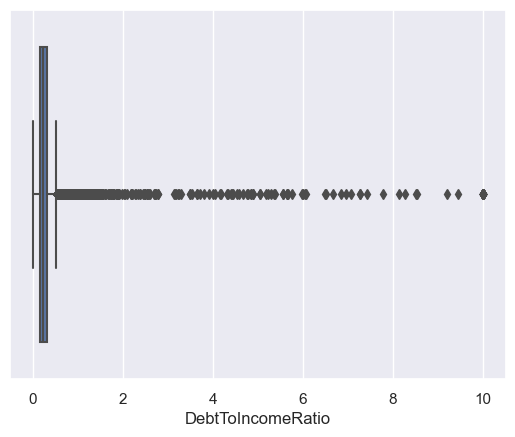

In [ ]:
sns.boxplot(new_df['DebtToIncomeRatio'])

In [ ]:
q1, q3 = np.percentile(new_df['DebtToIncomeRatio'], [25, 75])
iqr = q3 - q1
print("The Inter Quartile Range is: "+ str(iqr))
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = new_df[(new_df['DebtToIncomeRatio'] > upper_bound)]
print("The total number of outliers is: " + str (len(outliers['DebtToIncomeRatio'])))
#print(np.sort(outliers['DebtToIncomeRatio'].unique()))
new_df = new_df[(new_df['DebtToIncomeRatio'] >= lower_bound)
                        & (new_df['DebtToIncomeRatio'] <= upper_bound)]

The Inter Quartile Range is: 0.15
The total number of outliers is: 2546


C:\Users\WAGDY 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DebtToIncomeRatio'>

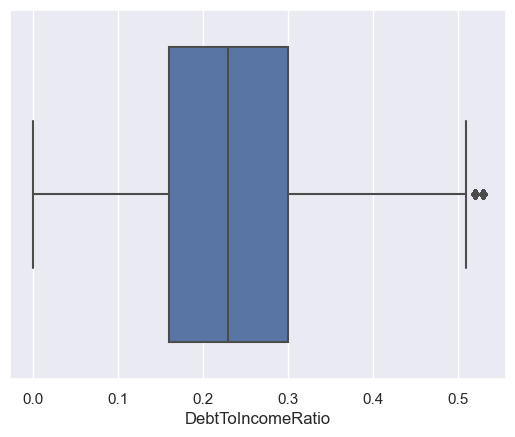

In [ ]:
sns.boxplot(new_df['DebtToIncomeRatio'])

C:\Users\WAGDY 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StatedMonthlyIncome'>

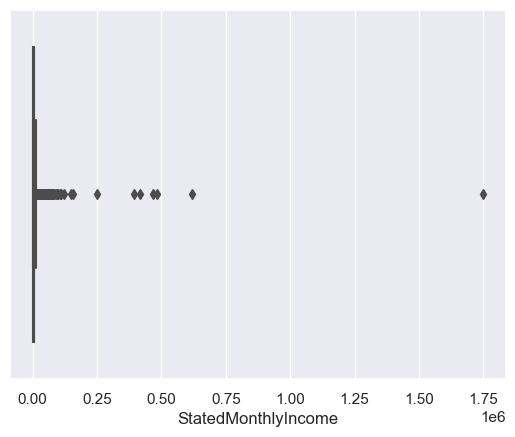

In [ ]:
sns.boxplot(new_df['StatedMonthlyIncome'])

In [ ]:
Q1, Q3 = np.percentile(new_df['StatedMonthlyIncome'], [25, 75])
IQR = Q3 - Q1
print("The Inter Quartile Range is: "+ str(IQR))
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
print(Lower_bound)
print(Upper_bound)
Outliers = new_df[(new_df['StatedMonthlyIncome'] > Upper_bound)]
print("The total number of Outliers is: " + str (len(Outliers['StatedMonthlyIncome'])))
#print(np.sort(Outliers['StatedMonthlyIncome'].unique()))
new_df = new_df[(new_df['StatedMonthlyIncome'] >= Lower_bound)
                        & (new_df['StatedMonthlyIncome'] <= Upper_bound)]

The Inter Quartile Range is: 3741.6666670000004
-2112.5000005
12854.166667500001
The total number of Outliers is: 3791


C:\Users\WAGDY 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StatedMonthlyIncome'>

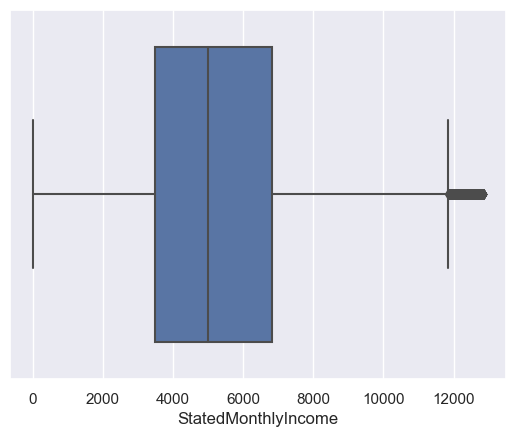

In [ ]:
sns.boxplot(new_df['StatedMonthlyIncome'])

In [ ]:
outliers = new_df[(new_df['DebtToIncomeRatio'] > upper_bound)]
print("The total number of outliers is: " + str (len(outliers['DebtToIncomeRatio'])))
Outliers = new_df[(new_df['StatedMonthlyIncome'] > Upper_bound)]
print("The total number of Outliers is: " + str (len(Outliers['StatedMonthlyIncome'])))

The total number of outliers is: 0
The total number of Outliers is: 0


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78516 entries, 1 to 113936
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ListingID              78516 non-null  object        
 1   ListingCreationDate    78516 non-null  datetime64[ns]
 2   Term                   78516 non-null  int64         
 3   LoanStatus             78516 non-null  object        
 4   BorrowerAPR            78516 non-null  float64       
 5   BorrowerRate           78516 non-null  float64       
 6   ProsperRating (Alpha)  78516 non-null  object        
 7   ProsperScore           78516 non-null  int32         
 8   ListingCategory        78516 non-null  object        
 9   BorrowerState          78516 non-null  object        
 10  Occupation             78516 non-null  object        
 11  EmploymentStatus       78516 non-null  object        
 12  IsBorrowerHomeowner    78516 non-null  bool          
 13  

In [ ]:
new_df.describe()

,Term,BorrowerAPR,BorrowerRate,ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenRevolvingAccounts,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,Year,Month,AvgCreditScore
count,78516.000000,78516.000000,78516.000000,78516.000000,78516.000000,78516.000000,78516.000000,78516.000000,78516.000000,78516.000000,78516.000000,78516.000000,78516.000000,78516.000000
mean,42.580162,0.226218,0.195628,5.944814,698.765857,717.765857,10.268455,7.239314,0.240974,5356.912572,8860.646773,2012.330773,6.708212,708.265857
std,11.664610,0.079360,0.074145,2.355026,46.983138,46.983138,5.168324,4.415683,0.105940,2550.949683,6065.762961,1.206514,3.666418,46.983138
min,12.000000,0.045830,0.040000,1.000000,600.000000,619.000000,0.000000,0.000000,0.010000,0.000000,1000.000000,2009.000000,1.000000,609.500000
25%,36.000000,0.163920,0.135900,4.000000,660.000000,679.000000,7.000000,4.000000,0.160000,3494.062500,4000.000000,2012.000000,3.000000,669.500000
50%,36.000000,0.219350,0.187500,6.000000,700.000000,719.000000,10.000000,6.000000,0.240000,5000.000000,7500.000000,2013.000000,7.000000,709.500000
75%,60.000000,0.289740,0.256600,8.000000,720.000000,739.000000,13.000000,9.000000,0.300000,6833.333333,13000.000000,2013.000000,10.000000,729.500000
max,60.000000,0.423950,0.360000,11.000000,880.000000,899.000000,59.000000,50.000000,0.530000,12853.333333,35000.000000,2014.000000,12.000000,889.500000


In [ ]:
[new_df[category].value_counts() for category in Obj]

[Current                   52324
 Completed                 18304
 Chargedoff                 4895
 Past Due                   1878
 Defaulted                   927
 FinalPaymentInProgress      188
 Name: LoanStatus, dtype: int64,
 C     17133
 B     14505
 A     13463
 D     13346
 E      9128
 HR     6060
 AA     4881
 Name: ProsperRating (Alpha), dtype: int64,
 Debt_Consolidation    49242
 Other                  8628
 Home_Improvement       6145
 Business               4884
 Auto                   2137
 Household_Expenses     1850
 Medical/Dental         1393
 Large_Purchases         811
 Taxes                   767
 Vacation                721
 Wedding_Loans           710
 Motorcycle              293
 Student_Use             254
 Engagement_Ring         206
 Baby&Adoption           183
 Cosmetic_Procedure       90
 Boat                     83
 Green_Loans              54
 RV                       46
 Not_Available            19
 Name: ListingCategory, dtype: int64,
 CA    9938
 NY 

## Feature Engineering

### Using Label Encoder & One Hot Encoder Functions

In [ ]:
cols = ['ProsperRating (Alpha)','IncomeRange', 'ListingCategory', 'EmploymentStatus']
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

new_oh = pd.DataFrame(OH_encoder.fit_transform(new_df[cols])).astype('int64')
print(new_oh.head(7))

new_oh.columns = OH_encoder.get_feature_names(cols)
print(new_oh.columns)

new_oh.index = new_df.index
print(new_oh.index)

new_he = pd.concat([new_df, new_oh], axis=1)
new_he = new_he.drop(['ProsperRating (Alpha)','IncomeRange', 'ListingCategory', 'EmploymentStatus'], axis= 1)

   0   1   2   3   4   5   6   7   8   9   ...  31  32  33  34  35  36  37  \
0   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
1   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
2   0   0   0   0   1   0   0   0   0   1  ...   0   0   0   1   0   0   0   
3   0   0   1   0   0   0   0   0   0   1  ...   0   0   0   1   0   0   0   
4   0   0   0   0   0   1   0   0   0   0  ...   0   0   0   1   0   0   0   
5   0   0   0   1   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
6   0   1   0   0   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   

   38  39  40  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  
5   0   0   0  
6   0   0   0  

[7 rows x 41 columns]
Index(['ProsperRating (Alpha)_A', 'ProsperRating (Alpha)_AA',
       'ProsperRating (Alpha)_B', 'ProsperRating (Alpha)_C',
       'ProsperRating (Alpha)_D', 'ProsperRating (Alpha)_E',
       'ProsperRating (Alpha)_HR', 'Inco

C:\Users\WAGDY 10\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
new_he['Occupation']= label_encoder(new_he['Occupation'])
new_he['BorrowerState']= label_encoder(new_he['BorrowerState'])
new_he['LoanStatus']= label_encoder(new_he['LoanStatus'])
new_he['ListingID']= label_encoder(new_he['ListingID'])

In [ ]:
new_he.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78516 entries, 1 to 113936
Data columns (total 64 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ListingID                           78516 non-null  int32         
 1   ListingCreationDate                 78516 non-null  datetime64[ns]
 2   Term                                78516 non-null  int64         
 3   LoanStatus                          78516 non-null  int32         
 4   BorrowerAPR                         78516 non-null  float64       
 5   BorrowerRate                        78516 non-null  float64       
 6   ProsperScore                        78516 non-null  int32         
 7   BorrowerState                       78516 non-null  int32         
 8   Occupation                          78516 non-null  int32         
 9   IsBorrowerHomeowner                 78516 non-null  bool          
 10  CreditScoreRangeLower

In [ ]:
new_he.to_csv("New Prosper Loan Data Project1.csv")